Finishing the EDA from where we left it in week 9

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler

In [2]:
data = pd.read_csv(f"{os.path.dirname(os.path.abspath(''))}/bank-additional/cleaned_data.csv", sep=",")

In [3]:
data.head()

,education,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,zscore
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,261.0,1.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,-0.563873
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,149.0,1.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,-0.563873
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,226.0,1.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,-0.563873
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,151.0,1.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,-0.563873
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,307.0,1.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,-0.563873


In [4]:
num_col = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
           'euribor3m', 'nr.employed']

# Correlations

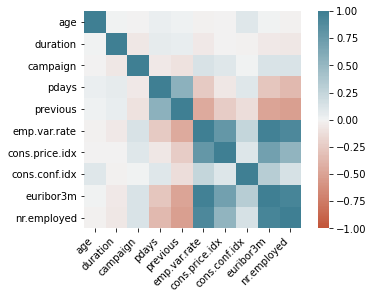

In [5]:
num_data = data.loc[:, num_col]
corr = num_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Dimensionality reduction

In [6]:
data_s = pd.read_csv(f"{os.path.dirname(os.path.abspath(''))}/bank-additional/cleaned_data_scaled.csv", sep=",")

In [7]:
X_s = data_s.drop('y_yes', axis=1)
X_s.describe()

,education,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.665623,0.285009,0.229616,0.138246,0.036054,0.029830,0.704593,0.524285,0.420128,0.651688,...,0.323808,0.097553,0.017020,0.013475,0.199281,0.199184,0.188890,0.189691,0.824221,0.032679
std,0.239354,0.126786,0.181317,0.187629,0.186427,0.073379,0.330069,0.224538,0.197801,0.397949,...,0.467933,0.296712,0.129346,0.115298,0.399465,0.399392,0.391426,0.392061,0.380637,0.177798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.185185,0.102317,0.000000,0.000000,0.000000,0.333333,0.340608,0.227197,0.160961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.666667,0.259259,0.179537,0.111111,0.000000,0.000000,0.937500,0.484412,0.376569,0.957379,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.833333,0.370370,0.299035,0.222222,0.000000,0.000000,1.000000,0.698753,0.602510,0.980957,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
X_s_dur = data_s.drop(['duration', 'y_yes'], axis=1)
X_s_dur.describe()

,education,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.665623,0.285009,0.138246,0.036054,0.029830,0.704593,0.524285,0.420128,0.651688,0.755001,...,0.323808,0.097553,0.017020,0.013475,0.199281,0.199184,0.188890,0.189691,0.824221,0.032679
std,0.239354,0.126786,0.187629,0.186427,0.073379,0.330069,0.224538,0.197801,0.397949,0.272746,...,0.467933,0.296712,0.129346,0.115298,0.399465,0.399392,0.391426,0.392061,0.380637,0.177798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.185185,0.000000,0.000000,0.000000,0.333333,0.340608,0.227197,0.160961,0.512287,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.666667,0.259259,0.111111,0.000000,0.000000,0.937500,0.484412,0.376569,0.957379,0.859735,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.833333,0.370370,0.222222,0.000000,0.000000,1.000000,0.698753,0.602510,0.980957,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [10]:
X_s.shape

(41188, 40)

In [11]:
X_s_dur2 = clean_dataset(X_s_dur)
X_s_dur2.shape
X_s2 = clean_dataset(X_s)
X_s2.shape

(41188, 40)

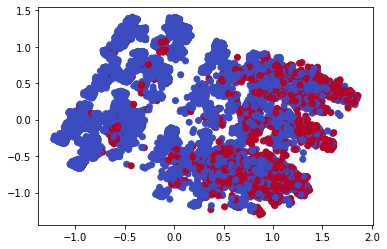

In [12]:
pca = PCA(n_components=2)

reduced_data = pca.fit_transform(X_s2)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=data.y_yes, cmap = 'coolwarm')
plt.show()

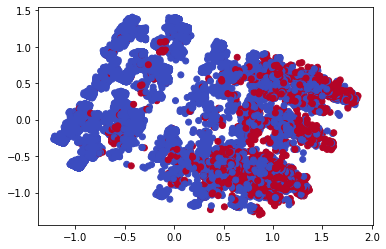

In [13]:
pca = PCA(n_components=2)

reduced_data = pca.fit_transform(X_s_dur2)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=data.y_yes, cmap = 'coolwarm')
plt.show()

## Feature importance

In [14]:
X = data.loc[:, data.columns != 'y_yes']
Y = data.loc[:, 'y_yes']
X_dur = data.drop(['duration', 'y_yes'], axis=1)
names = X.columns.values
names_dur = X_dur.columns.values

rfc = RandomForestClassifier()

rfc.fit(X_s, Y)

forest_importances = pd.Series(rfc.feature_importances_, index=names)

forest_importances.sort_values(ascending=False)

job_entrepreneur        0.254311
job_technician          0.126872
job_blue-collar         0.102112
job_unemployed          0.061331
education               0.044748
job_management          0.032938
job_housemaid           0.029938
marital_married         0.029821
zscore                  0.026236
job_student             0.026091
job_services            0.025672
job_self-employed       0.020722
job_retired             0.015217
month_sep               0.014969
day_of_week_mon         0.013625
month_nov               0.012899
cons.price.idx          0.012868
emp.var.rate            0.012642
euribor3m               0.012539
cons.conf.idx           0.012433
day_of_week_thu         0.012301
marital_single          0.010039
month_jul               0.009093
month_dec               0.008557
month_mar               0.008147
nr.employed             0.007916
pdays                   0.006823
month_may               0.006434
age                     0.006313
month_jun               0.005387
month_oct 

Text(0.5, 1.0, 'Variable Importance')

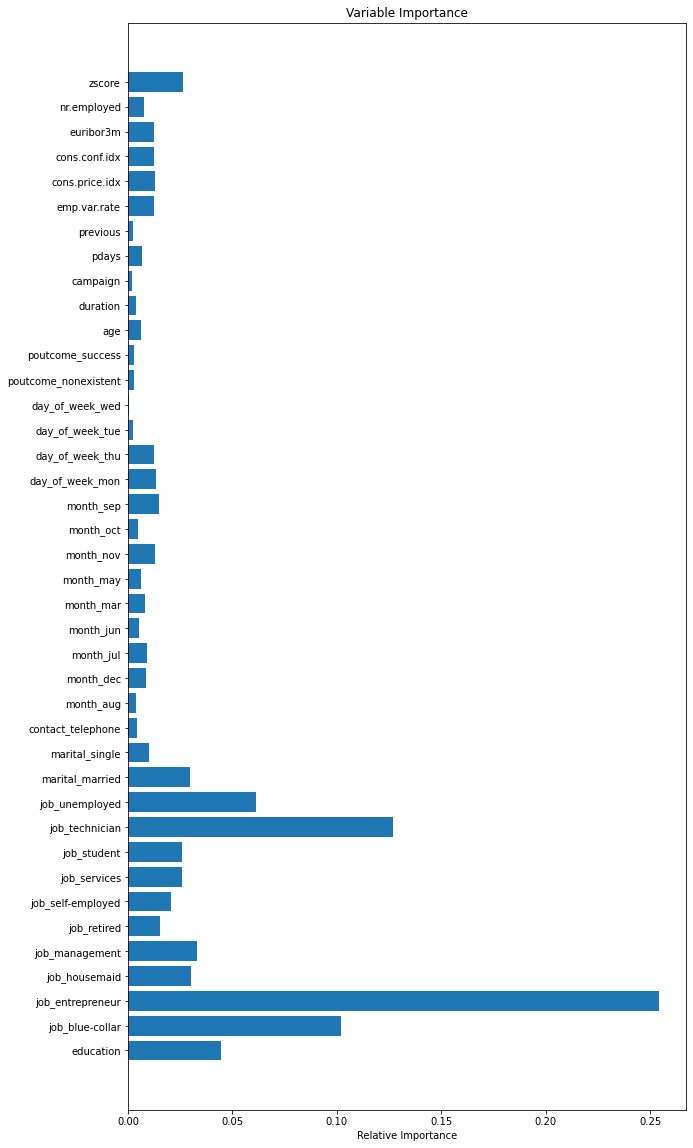

In [15]:
# Plot the data
plt.figure(figsize=(10, 20))
plt.barh(forest_importances.index, forest_importances, align='center')

plt.xlabel("Relative Importance")
plt.title("Variable Importance")

In [16]:
rfc_dur = RandomForestClassifier()

rfc_dur.fit(X_s_dur, Y)

forest_importances_dur = pd.Series(rfc_dur.feature_importances_, index=names_dur)

forest_importances_dur.sort_values(ascending=False)

job_blue-collar         0.233551
job_student             0.143344
education               0.075018
job_technician          0.067194
job_unemployed          0.040735
job_entrepreneur        0.040359
job_housemaid           0.035862
job_services            0.027870
zscore                  0.023611
job_self-employed       0.021872
month_oct               0.021659
job_retired             0.019429
job_management          0.018997
month_sep               0.018724
month_may               0.018289
emp.var.rate            0.015661
euribor3m               0.015455
cons.price.idx          0.015233
day_of_week_mon         0.014885
cons.conf.idx           0.014798
marital_married         0.013429
month_aug               0.012089
month_dec               0.011197
month_jun               0.011043
nr.employed             0.008632
month_mar               0.008195
month_jul               0.007758
pdays                   0.006511
month_nov               0.006391
marital_single          0.006178
contact_te

Text(0.5, 1.0, 'Variable Importance')

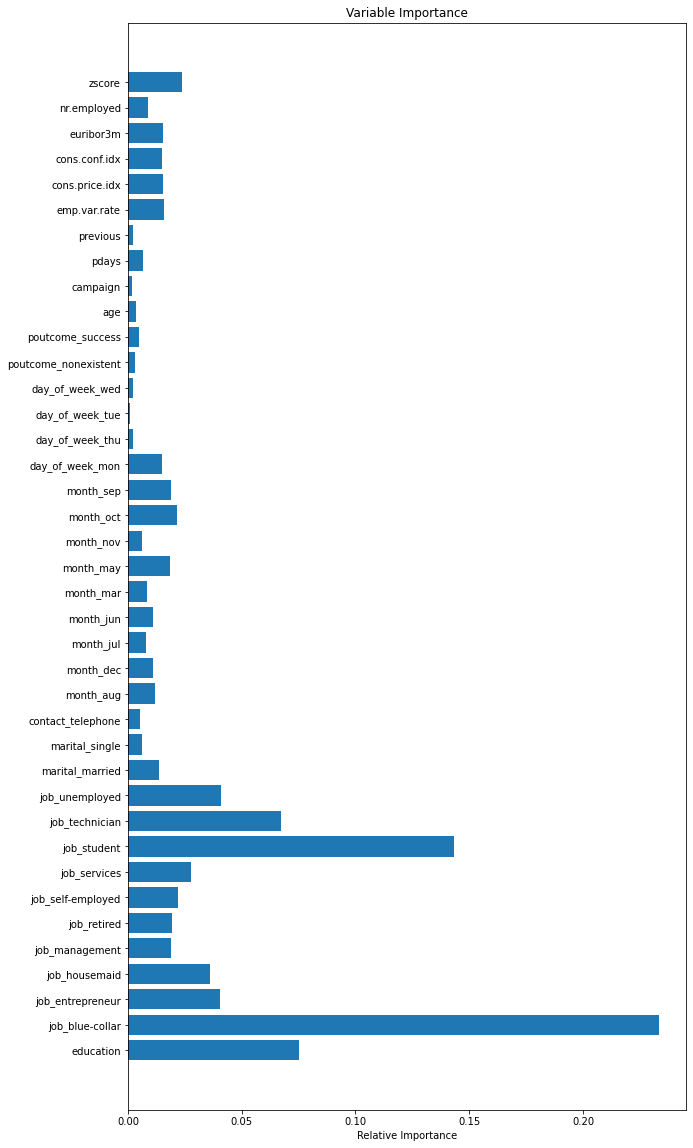

In [17]:
# Plot the data
plt.figure(figsize=(10, 20))
plt.barh(forest_importances_dur.index, forest_importances_dur, align='center')

plt.xlabel("Relative Importance")
plt.title("Variable Importance")

In [18]:
test = SelectKBest(score_func=f_classif)
fit = test.fit(X_s, Y)
kbest_importances = pd.Series(fit.scores_, index=names)
kbest_importances.sort_values(ascending=False)

job_unemployed          6107.352013
job_management          5651.862214
job_entrepreneur        5399.671591
zscore                  5302.414081
job_technician          4104.815360
job_self-employed       3895.766563
job_retired             1987.843365
age                     1027.766878
nr.employed              989.773086
pdays                    946.059104
day_of_week_thu          799.433778
previous                 753.604079
job_services             721.625163
month_may                443.678491
duration                 439.503437
month_jul                414.059121
day_of_week_wed          300.188471
job_student              258.196739
marital_single           235.619768
day_of_week_mon          178.133793
marital_married          165.564155
job_housemaid            164.101615
education                 88.121034
job_blue-collar           44.781331
poutcome_nonexistent      37.876548
month_mar                 33.182083
month_sep                 32.690063
cons.price.idx            16

In [19]:
test = SelectKBest(score_func=f_classif)
fit = test.fit(X_s_dur, Y)
kbest_importances_dur = pd.Series(fit.scores_, index=names_dur)
kbest_importances_dur.sort_values(ascending=False)

job_technician          6107.352013
job_housemaid           5651.862214
zscore                  5302.414081
job_student             4104.815360
job_retired             3895.766563
job_management          1987.843365
poutcome_success        1027.766878
nr.employed              989.773086
pdays                    946.059104
day_of_week_mon          799.433778
previous                 753.604079
job_self-employed        721.625163
month_mar                443.678491
age                      439.503437
month_dec                414.059121
day_of_week_tue          300.188471
job_services             258.196739
marital_married          235.619768
month_sep                178.133793
job_unemployed           165.564155
job_entrepreneur         164.101615
education                 88.121034
job_blue-collar           44.781331
day_of_week_wed           37.876548
month_jun                 33.182083
month_oct                 32.690063
cons.price.idx            16.748478
month_nov                 15

In [20]:
index_to_drop = forest_importances.index[forest_importances<0.01].intersection(kbest_importances.index[kbest_importances<500])
index_to_drop

Index(['contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_oct', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success',
       'duration', 'campaign'],
      dtype='object')

In [21]:
index_to_drop_dur = forest_importances_dur.index[forest_importances_dur<0.01].intersection(kbest_importances_dur.index[kbest_importances_dur<500])
index_to_drop_dur

Index(['marital_single', 'contact_telephone', 'month_jul', 'month_mar',
       'month_nov', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'age', 'campaign'],
      dtype='object')

In [22]:
data2 = data.drop(index_to_drop, axis=1)
data2.to_csv(f"{os.path.dirname(os.path.abspath(''))}/bank-additional/filtered_data.csv", index=False)

In [23]:
data2 = data.drop(index_to_drop_dur, axis=1)
data2.to_csv(f"{os.path.dirname(os.path.abspath(''))}/bank-additional/filtered_data_dur.csv", index=False)

In [24]:
data_s2 = data_s.drop(index_to_drop, axis=1)
data_s2.to_csv(f"{os.path.dirname(os.path.abspath(''))}/bank-additional/filtered_data_scaled.csv", index=False)

In [25]:
data_s2 = data_s.drop(index_to_drop_dur, axis=1)
data_s2.to_csv(f"{os.path.dirname(os.path.abspath(''))}/bank-additional/filtered_data_scaled_dur.csv", index=False)